In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

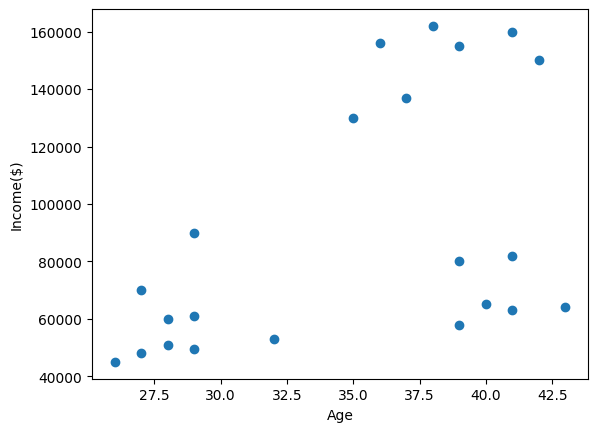

In [4]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [7]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

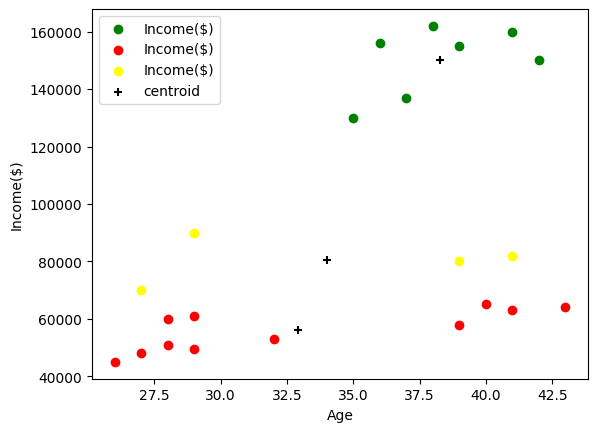

In [15]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0.Age, df0['Income($)'], color='green',label='Income($)')
plt.scatter(df1.Age, df1['Income($)'], color='red',label='Income($)')
plt.scatter(df2.Age, df2['Income($)'], color='yellow',label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',color='black',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# Preprocessing using min max scaler

In [19]:
scale = MinMaxScaler()
scale.fit(df[['Income($)']])
df['Income($)'] = scale.transform(df[['Income($)']])
scale.fit(df[['Age']])
df[['Age']] = scale.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


Text(0, 0.5, 'Income($)')

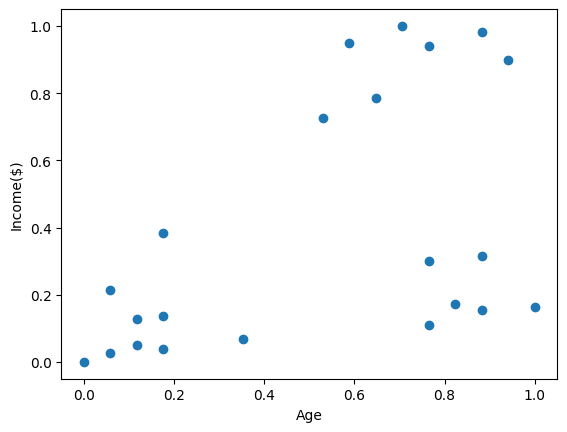

In [20]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [27]:
df = df.drop('cluster',axis=1)
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [28]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [29]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


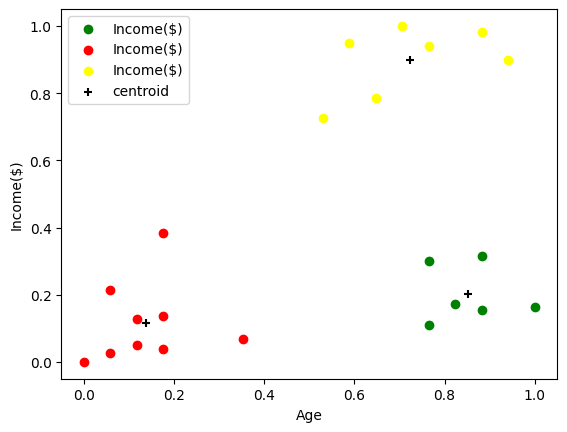

In [30]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0.Age, df0['Income($)'], color='green',label='Income($)')
plt.scatter(df1.Age, df1['Income($)'], color='red',label='Income($)')
plt.scatter(df2.Age, df2['Income($)'], color='yellow',label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',color='black',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# Elbow Plot

In [34]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [35]:
sse

[5.434011511988176,
 2.3456144914725936,
 0.47507834985530945,
 0.4026672680433808,
 0.3451952191440948,
 0.28246436906814076,
 0.1987930359477545,
 0.14926861678998427,
 0.12707881975804078]

Text(0.5, 0, 'K')

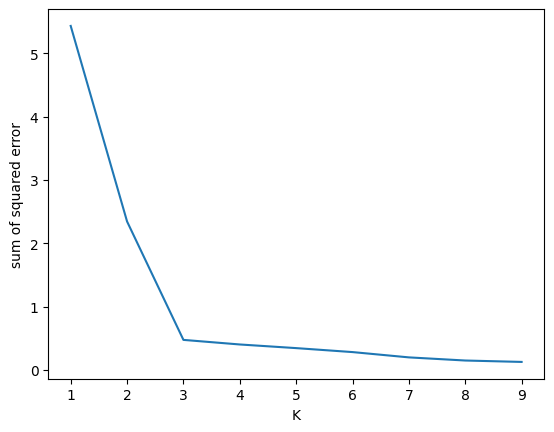

In [37]:
plt.plot(k_rng,sse)
plt.ylabel('sum of squared error')
plt.xlabel('K')